In [12]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('airline_passengers.csv')
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,NaN,NaN


<AxesSubplot:>

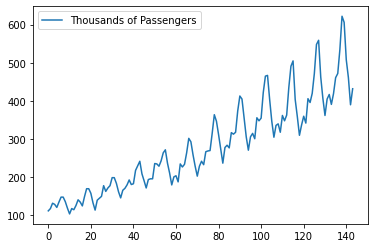

In [7]:
df.plot()

In [8]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [9]:
df.dropna(axis=0, inplace=True)
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [10]:
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [13]:
model = Prophet()

In [14]:
model.fit(df)

23:41:11 - cmdstanpy - INFO - Chain [1] start processing
23:41:12 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [15]:
future_dates = model.make_future_dataframe(periods=365)
future_dates

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30


In [18]:
prediction = model.predict(future_dates)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.649986,56.422452,112.315067,106.649986,106.649986,-21.919811,-21.919811,-21.919811,-21.919811,-21.919811,-21.919811,0.0,0.0,0.0,84.730175
1,1949-02-01,108.824900,49.804770,107.318888,108.824900,108.824900,-30.691427,-30.691427,-30.691427,-30.691427,-30.691427,-30.691427,0.0,0.0,0.0,78.133473
2,1949-03-01,110.789338,81.927538,140.565388,110.789338,110.789338,-0.511120,-0.511120,-0.511120,-0.511120,-0.511120,-0.511120,0.0,0.0,0.0,110.278218
3,1949-04-01,112.964252,77.980783,136.173763,112.964252,112.964252,-5.172677,-5.172677,-5.172677,-5.172677,-5.172677,-5.172677,0.0,0.0,0.0,107.791575
4,1949-05-01,115.069008,81.446535,140.320247,115.069008,115.069008,-3.766717,-3.766717,-3.766717,-3.766717,-3.766717,-3.766717,0.0,0.0,0.0,111.302290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1961-11-27,520.573111,469.617939,527.041434,519.979611,521.233221,-22.382101,-22.382101,-22.382101,-22.382101,-22.382101,-22.382101,0.0,0.0,0.0,498.191010
505,1961-11-28,520.673525,468.633557,524.289145,520.075814,521.336908,-24.010977,-24.010977,-24.010977,-24.010977,-24.010977,-24.010977,0.0,0.0,0.0,496.662548
506,1961-11-29,520.773938,467.478021,523.369052,520.174376,521.441550,-26.276704,-26.276704,-26.276704,-26.276704,-26.276704,-26.276704,0.0,0.0,0.0,494.497234
507,1961-11-30,520.874352,461.817060,521.405871,520.271942,521.547146,-29.135087,-29.135087,-29.135087,-29.135087,-29.135087,-29.135087,0.0,0.0,0.0,491.739265


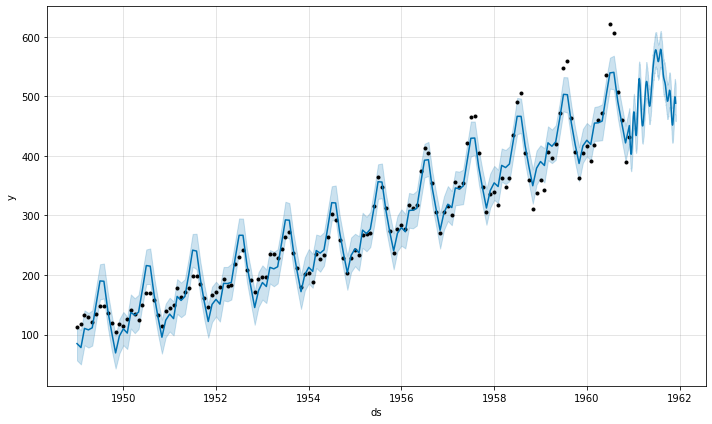

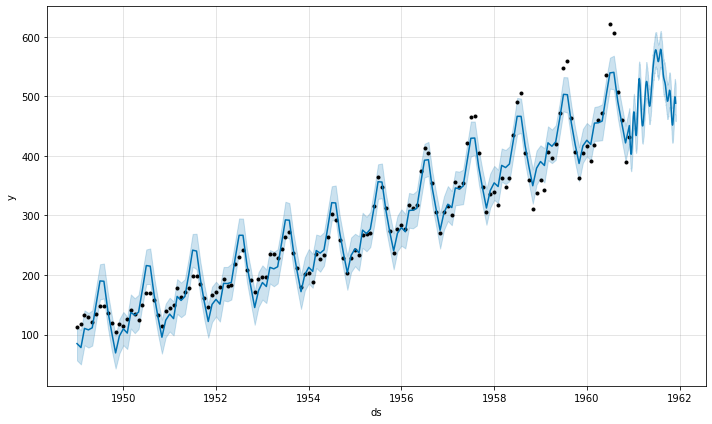

In [19]:
model.plot(prediction)

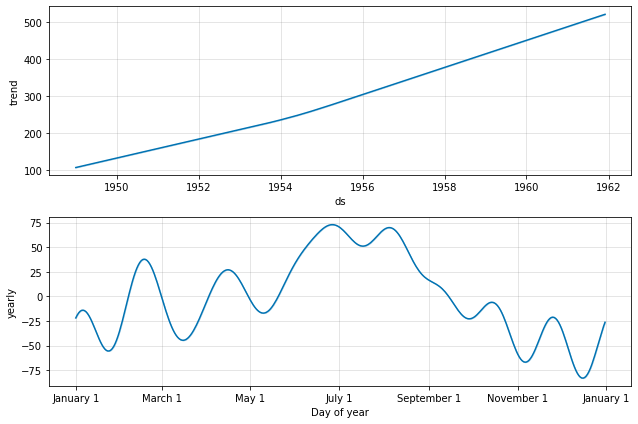

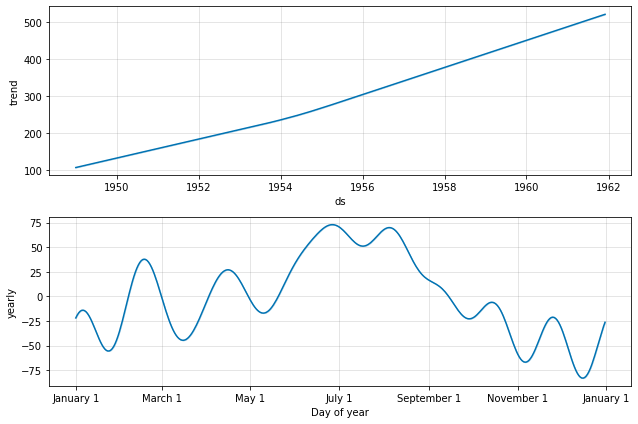

In [20]:
model.plot_components(prediction)

In [21]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_cv.head()

  0%|          | 0/19 [00:00<?, ?it/s]23:56:07 - cmdstanpy - INFO - Chain [1] start processing
23:56:40 - cmdstanpy - INFO - Chain [1] done processing
  5%|▌         | 1/19 [00:33<10:09, 33.85s/it]23:56:41 - cmdstanpy - INFO - Chain [1] start processing
23:56:42 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 2/19 [00:35<04:15, 15.04s/it]23:56:43 - cmdstanpy - INFO - Chain [1] start processing
23:56:43 - cmdstanpy - INFO - Chain [1] done processing
 16%|█▌        | 3/19 [00:37<02:23,  8.95s/it]23:56:44 - cmdstanpy - INFO - Chain [1] start processing
23:56:45 - cmdstanpy - INFO - Chain [1] done processing
 21%|██        | 4/19 [00:39<01:32,  6.17s/it]23:56:46 - cmdstanpy - INFO - Chain [1] start processing
23:56:47 - cmdstanpy - INFO - Chain [1] done processing
 26%|██▋       | 5/19 [00:41<01:03,  4.57s/it]23:56:48 - cmdstanpy - INFO - Chain [1] start processing
23:56:49 - cmdstanpy - INFO - Chain [1] done processing
 32%|███▏      | 6/19 [00:42<00:46,  3.60s/it]23:56:50

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,156.860298,156.597233,157.092424,150.0,1951-01-18
1,1951-03-01,167.860783,167.038807,168.680533,178.0,1951-01-18
2,1951-04-01,154.548772,152.849493,156.222269,163.0,1951-01-18
3,1951-05-01,140.452709,137.670115,142.984958,172.0,1951-01-18
4,1951-06-01,173.971555,170.107397,177.660531,178.0,1951-01-18


In [22]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1084.414469,32.930449,25.852182,0.078430,0.073825,0.079470,0.227273
1,42 days,1012.726995,31.823372,25.356149,0.077611,0.073825,0.078343,0.181818
2,46 days,910.075032,30.167450,24.860582,0.079951,0.084235,0.079703,0.136364
3,47 days,1045.958737,32.341285,27.053500,0.083236,0.085745,0.083371,0.136364
4,48 days,1034.718606,32.167042,26.463562,0.081129,0.085745,0.081340,0.181818


c:\Python310\lib\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
c:\Python310\lib\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


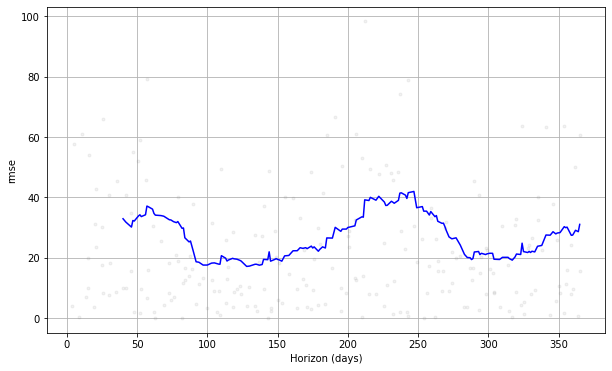

In [23]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')